## Data Preparation and Modelling

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
# let's load our cleaned dataset
df1 = pd.read_csv("C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\data\\processed\\cleaned_car_data.csv")

In [3]:
df1.sample(3)

,Car_Name,Year,Age,Selling_Price($),Present_Price($),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
195,I10,2011,13,2.95,4.60,53460,Petrol,Dealer,Manual,0
228,Eon,2016,8,3.10,4.43,11849,Petrol,Dealer,Manual,0
108,Royal Enfield Classic 350,2015,9,1.15,1.47,17000,Petrol,Individual,Manual,0


#### 1. Encoding The Categorical Data

In [4]:
# One hot encoding the categorical data, first let's how many categorical variables we have
len(df1.select_dtypes("object").columns)

4

In [5]:
# we have 4 categorical variables, now let's see which are
df1.select_dtypes("object").columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [6]:
# now let's see how many variables are there in each category
for col in df1.select_dtypes("object").columns:
    print(col," " ,df1[col].nunique())

Car_Name   96
Fuel_Type   3
Seller_Type   2
Transmission   2


As we can see above we have 
1. 96 unique car brands in the car_name variable
2. there are 3 unique fuel types.
3. there are 2 unique seller types.
4. there are 2 transmission types.
........................................but the name of the car will not contribute anything for our target variable which is selling pirce so we will get rid of this column.

In [7]:
# removing the car name column.
df1.drop("Car_Name", axis = 1, inplace =True)

In [8]:
df1.sample(3)

,Year,Age,Selling_Price($),Present_Price($),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
289,2015,9,4.0,5.9,60000,Petrol,Dealer,Manual,0
211,2012,12,4.5,9.4,36000,Petrol,Dealer,Manual,0
200,2017,7,7.9,8.1,3435,Petrol,Dealer,Manual,0


In [9]:
# now let's perform our one hot encoding
df = pd.get_dummies(df1, drop_first = True, dtype = "int" )
df

,Year,Age,Selling_Price($),Present_Price($),Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,10,3.35,5.59,27000,0,0,1,0,1
1,2013,11,4.75,9.54,43000,0,1,0,0,1
2,2017,7,7.25,9.85,6900,0,0,1,0,1
3,2011,13,2.85,4.15,5200,0,0,1,0,1
4,2014,10,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
288,2016,8,9.50,11.60,33988,0,1,0,0,1
289,2015,9,4.00,5.90,60000,0,0,1,0,1
290,2009,15,3.35,11.00,87934,0,0,1,0,1
291,2017,7,11.50,12.50,9000,0,1,0,0,1


In [10]:
# let's check the shape of this dataframe
df.shape

(293, 10)

In the data cleaning step we have performed the task of extracting the age information from the model year column, here both will contribute the same, so we have to remove one of them from our dataset to overcome the problem of overfitting.
here we drop the year column from our dataset.

In [11]:
# removing the year column
df.drop("Year", axis = 1, inplace = True)

In [12]:
df.sample(3)

,Age,Selling_Price($),Present_Price($),Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
149,7,0.48,0.51,4300,0,0,1,1,0
145,8,0.50,0.55,31000,0,0,1,1,1
165,9,0.40,0.55,6700,0,0,1,1,1


In [13]:
df.shape

(293, 9)

#### 2. Correlation Matrix

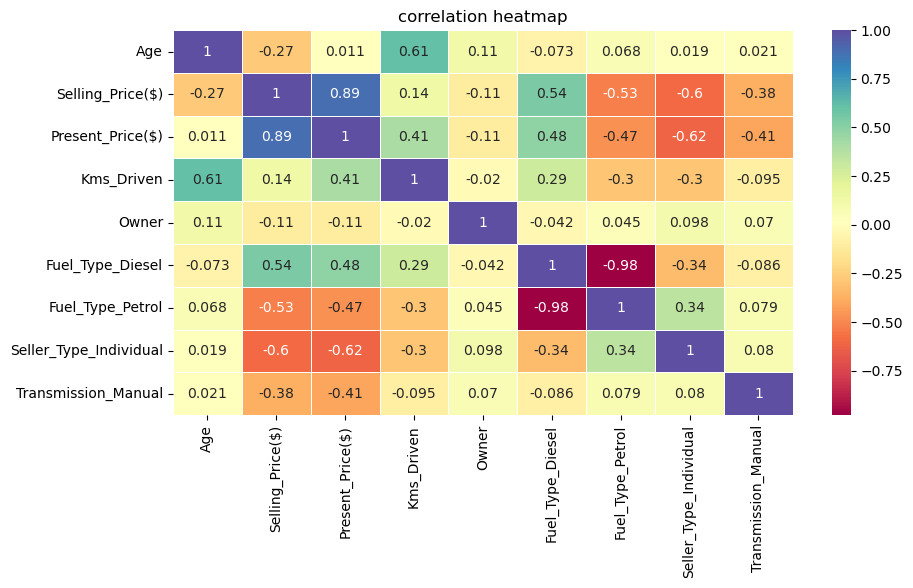

In [14]:
# Now let's Draw a correlation heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.title("correlation heatmap")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\1.0 correlation_plot.jpg")
plt.show()

As we can see from the above correlation plot:
1. Kms_Driven and Owner are the two variables with the lowest correlation with our target variable Selling Price.

In [15]:
df2 = df.drop("Selling_Price($)", axis = 1)

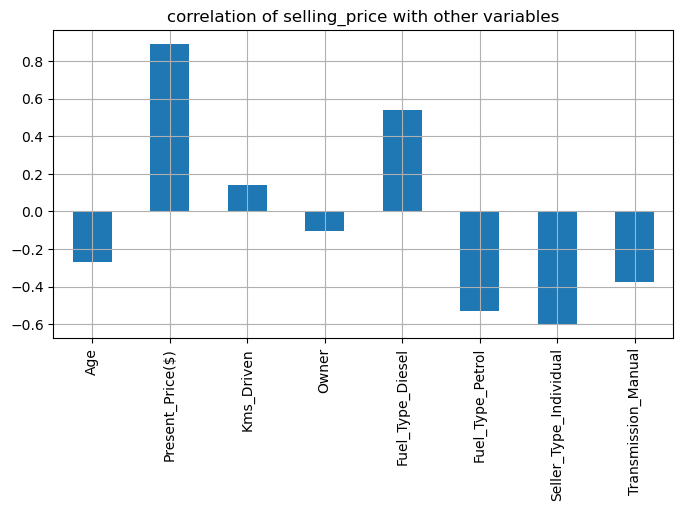

In [16]:
# Let's See Specifically the correlation plot for the Selling Price variable
plt.figure(figsize = (8,4))
df2.corrwith(df["Selling_Price($)"]).plot(kind = "bar", grid = True)
plt.title("correlation of selling_price with other variables")
plt.savefig("C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\2.0 correlation of selling_price with other variables.jpg")
plt.show()

#### 3. Splitting Our Dataset

In [17]:
# first let's import the train test split from the scikit learn model selection module
from sklearn.model_selection import train_test_split

In [18]:
# Now let's specifiy out Dependent and independent variables
x = df.drop("Selling_Price($)", axis = 1) # independent variables
y = df["Selling_Price($)"] # dependent variables.

In [19]:
# displaying sample records from the independent variables
x.sample(2)

,Age,Present_Price($),Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
9,9,8.92,42367,0,1,0,0,1
270,8,8.40,4000,0,0,1,0,1


In [20]:
# shape of independent variables
x.shape

(293, 8)

In [21]:
# displaying sample records from the dependent variable
y.sample(2)

234     4.4
291    11.5
Name: Selling_Price($), dtype: float64

In [22]:
# shape of dependent variable
y.shape

(293,)

In [23]:
# now let's split our data in to trianing and testing set's
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state =42)

In [24]:
x_train.shape

(263, 8)

In [25]:
x_test.shape

(30, 8)

In [26]:
y_train.shape

(263,)

In [27]:
y_test.shape

(30,)

In this project I use two predictive regression models
1. Linear_regression
2. Random_forest Regression models

#### 4. Model Building

##### 1. Linear Regression

In [28]:
# firs let's import the necessary libraries for the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
# Now let's initialize the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model

LinearRegression()

In [30]:
# Now let's trian our data
lin_reg_model.fit(x_train,y_train)

LinearRegression()

1.1 Linear Regression Model Evaluation

In [31]:
prediction = lin_reg_model.predict(x_test)
prediction

array([ 3.99946996,  4.86014114,  2.06580617,  0.21771924,  1.16775605,
        1.00955147,  6.8729233 ,  0.89786998,  7.063521  , 16.83497071,
       -0.17457061,  8.05217746,  6.27352747,  8.95011019,  4.87982188,
       16.88278987, -0.16987612,  9.45065505,  2.69618835,  4.9519048 ,
        1.75384976,  3.63127578,  4.96212533,  0.92977012,  2.11661821,
        7.61632097,  8.91687924,  1.3674978 ,  4.74221988,  2.45057149])

In [32]:
my_dict = {"actual":y_test, "prediction":prediction}

In [33]:
pd.DataFrame(my_dict)

,actual,prediction
84,4.75,3.999470
260,4.80,4.860141
45,2.65,2.065806
176,0.27,0.217719
143,0.51,1.167756
125,0.75,1.009551
227,9.10,6.872923
118,0.95,0.897870
9,7.45,7.063521
90,20.75,16.834971


In [34]:
# now let's evaluate our model using evaluation metrices
def model_evaluator(actual, prediction):
    MAE = mean_absolute_error(actual,prediction)
    MSE = mean_squared_error(actual,prediction)
    R2_score = r2_score(actual,prediction)
    return MAE, MSE, R2_score

In [35]:
pd.DataFrame(model_evaluator(y_test,prediction), index = ["MAE","MSE","R2_score"], columns = ["Value"])

,Value
MAE,0.841602
MSE,1.372383
R2_score,0.934676


<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

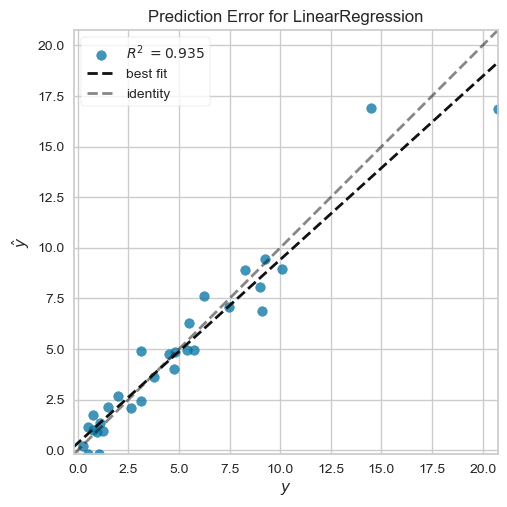

In [36]:
# Now let's visualize our findings
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lin_reg_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show(outpath = "C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\3.0 prediction_error_plot_for linear regression model.jpg",format = "jpg")

From the above prediction error plot we can see that:
1. R2 value of 0.935 This suggests a strong correlation between the predicted values and the actual values, implying the model is performing well.
2. Line of Best Fit: The dashed line represents the line of best fit for the predicted versus actual values. Since this line is close to the identity line (the 45-degree diagonal), it further confirms that the model's predictions are in good agreement with the actual values.

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

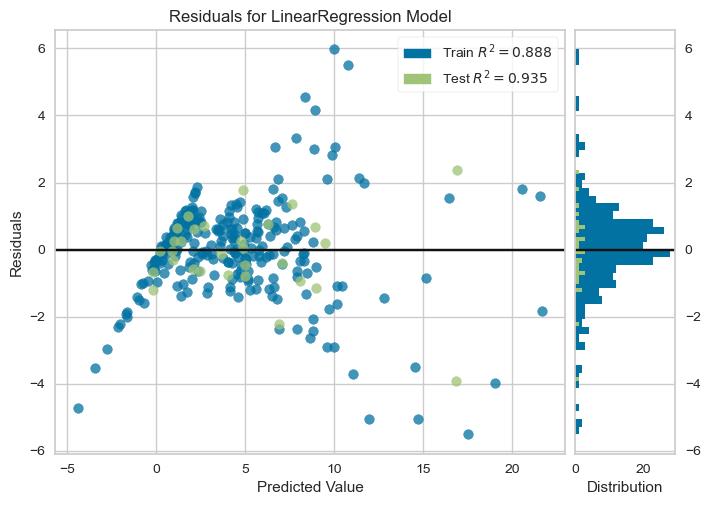

In [37]:
# Let's visualize our result using residuals plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lin_reg_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show(outpath = "C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\4.0 residuals plot for linear regression model.jpg", format ="jpg")

form the above linear regression residual plot we can see that:
1. the linear regression model achieves training r2_score of 0.888 and test r2_score of 0.935

In [38]:
# Now let's save our model
import joblib
joblib.dump(lin_reg_model, "C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\linear_regression_model.pkl")

['C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\linear_regression_model.pkl']

##### 2. Random Forest Regression

In [39]:
# let's import the necessary libraries for the random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
#Now let's initialize our model
rand_forest_model = RandomForestRegressor()
rand_forest_model

RandomForestRegressor()

In [41]:
# now let's train our data using random forest regressor
rand_forest_model.fit(x_train,y_train)

RandomForestRegressor()

2.1 Model evaluation for random forest regression model

In [42]:
# let's predict our test set
pred = rand_forest_model.predict(x_test)
pred

array([ 3.9965,  5.15  ,  3.3105,  0.2687,  0.5887,  0.5477,  8.4225,
        1.0805,  7.0061, 21.3861,  0.528 , 10.067 ,  5.696 , 10.778 ,
        3.491 , 16.7792,  2.2505,  7.895 ,  2.889 ,  5.068 ,  0.6505,
        3.345 ,  4.9655,  1.0925,  3.7145,  7.9116,  9.0415,  1.147 ,
        5.2725,  3.178 ])

In [43]:
my_dict = {"actual":y_test, "prediction":pred}

In [44]:
pd.DataFrame(my_dict)

,actual,prediction
84,4.75,3.9965
260,4.80,5.1500
45,2.65,3.3105
176,0.27,0.2687
143,0.51,0.5887
125,0.75,0.5477
227,9.10,8.4225
118,0.95,1.0805
9,7.45,7.0061
90,20.75,21.3861


In [45]:
# now let's evaluate this prediction using the model evalueation function we define above
pd.DataFrame(model_evaluator(y_test,pred), index = ["MAE","MSE","R2_score"],columns = ["Vlue"])

,Vlue
MAE,0.645053
MSE,0.771063
R2_score,0.963298


<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

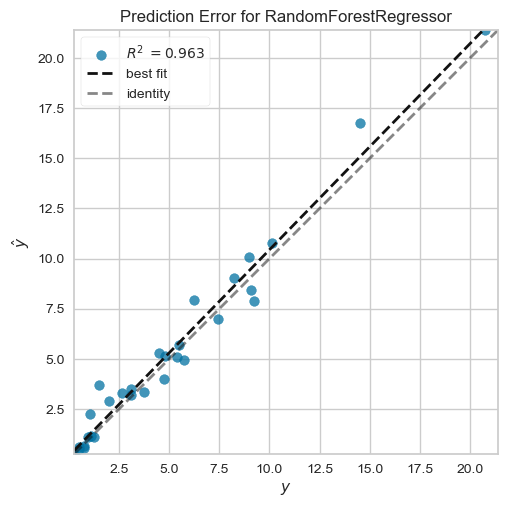

In [46]:
# Now let's visualize our findings for random forest regressor
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rand_forest_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show(outpath = "C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\5.0 prediction_error_plot_for random forest model.jpg",format = "jpg")

As we can see from the above Prediction Error plot:
1. The random forest regression model achievs better r2 score of 0.962 than that of linear regression model.
2. Line of Best Fit: The dashed line represents the line of best fit for the predicted versus actual values. Since this line is close to the identity line (the 45-degree diagonal), it further confirms that the model's predictions are in good agreement with the actual values.

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

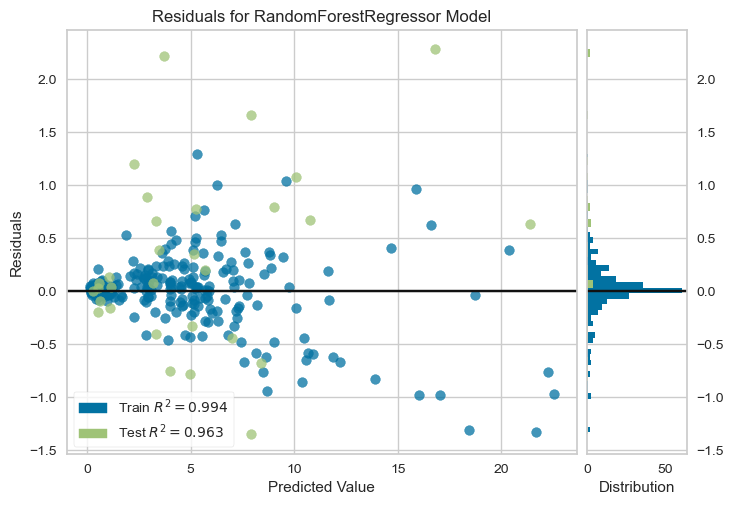

In [47]:
# Let's visualize our result using residuals plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rand_forest_model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)
visualizer.show(outpath = "C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\6.0 residuals plot for the random forest regression model.jpg", format ="jpg")

form the above residual plot we can see that:
1. the random forest regression model achieves training r2_score of 0.994 and test r2_score of 0.962

In [48]:
# now let's save the random forest regression model
import joblib
joblib.dump(rand_forest_model, "C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\random_forest_regression_model.pkl")

['C:\\Users\\yozil\\Desktop\\My projects\\used car price prediction\\used_car_price_prediction\\models\\random_forest_regression_model.pkl']

## SO I SELECT The RANDOM FOREST REGRESSION MODEL AS MY BEST MODEL.